In [2]:
import pandas as pd
train = pd.read_csv('severity_data_classification.csv')

In [3]:
train.shape

(7076, 14615)

In [8]:
Train = train.drop(['Unnamed: 0','Policynumber','Claim_Count','Blame','Total_Incurred'],axis=1)
Train2 = Train.fillna('0')

In [9]:
Train2.shape

(7076, 14610)

In [11]:
Train2.columns[14609]

'severity_class'

In [12]:
Train2.head()

,ADDDVREBCTEXT1_accountancy,ADDDVREBCTEXT1_acousticengineer,ADDDVREBCTEXT1_addressingcircularisingservices,ADDDVREBCTEXT1_advertising,ADDDVREBCTEXT1_aerialerector,ADDDVREBCTEXT1_aerialmanufacturer,ADDDVREBCTEXT1_aerialphotography,ADDDVREBCTEXT1_aerialsupplier,ADDDVREBCTEXT1_aerospaceindustry,ADDDVREBCTEXT1_agriculturalengineer,...,RADIUSLIMIT,CONFINE1_1,CONFINE1_2,CONFINE1_3,CONFINE1_4,CONFINE2_1,CONFINE2_2,CONFINE2_3,CONFINE2_4,severity_class
0,0,0,0,0,0,0,0,0,0,0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100
1,0,0,0,0,0,0,0,0,0,0,...,100.0,600.0,6.0,0.0,0.0,100.0,3.0,0.0,0.0,0
2,0,0,0,0,0,0,0,0,0,0,...,100.0,160.0,4.0,0.0,0.0,235.0,3.0,0.0,0.0,0
3,0,0,0,0,0,0,0,0,0,0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
import numpy as np
X = np.array(Train2[Train2.columns[0:14608]])
y = np.array (Train2.severity_class)
print (X.shape)
print (y.shape)

(7076, 14608)
(7076,)


In [14]:
from sklearn.cross_validation import train_test_split
X_train_unproc, X_test_unproc,y_train, y_test = train_test_split(X,y,test_size=0.3)

/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [123]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=5,max_depth=3,splitter='random')
clf = clf.fit(X_train_unproc,y_train)

In [24]:
y_test_pred = clf.predict(X_test_unproc)
from sklearn.metrics import classification_report
print (classification_report(y_test,y_test_pred))

             precision    recall  f1-score   support

          0       0.24      0.49      0.32       398
      0-100       0.16      0.04      0.07       194
   100-1000       0.33      0.64      0.43       495
  1000-2000       0.00      0.00      0.00       141
10000-20000       0.14      0.05      0.08       171
  2000-3000       0.07      0.03      0.04       180
     20000+       0.00      0.00      0.00        36
  3000-5000       0.11      0.07      0.09       203
  5000-7000       0.00      0.00      0.00       168
 7000-10000       0.00      0.00      0.00       137

avg / total       0.16      0.26      0.19      2123



/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [124]:
clf.score(X_test_unproc,y_test)

0.28261893546867639

In [125]:
clf.score(X_train_unproc,y_train)

0.28003230365435089

In [126]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,y_test_pred )

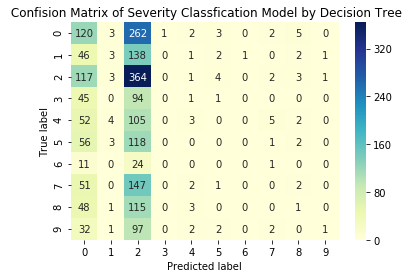

In [127]:
import matplotlib.pyplot as plt
import seaborn as sn
# df_cm = pd.DataFrame(cnf_matrix)
sn.heatmap(cnf_matrix,annot=True, fmt="d", cmap="YlGnBu",linecolor='r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(' Confision Matrix of Severity Classfication Model by Decision Tree')

In [133]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(oob_score=True,min_samples_leaf=5,max_depth=3)
random_clf.fit(X_train_unproc,y_train)

/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [45]:
y_test_pred = random_clf.predict(X_test_unproc)
from sklearn.metrics import classification_report
print (classification_report(y_test,y_test_pred))

             precision    recall  f1-score   support

          0       0.23      0.45      0.31       398
      0-100       0.07      0.05      0.06       194
   100-1000       0.30      0.56      0.39       495
  1000-2000       0.06      0.02      0.03       141
10000-20000       0.15      0.04      0.06       171
  2000-3000       0.17      0.06      0.09       180
     20000+       0.50      0.03      0.05        36
  3000-5000       0.12      0.05      0.07       203
  5000-7000       0.09      0.02      0.03       168
 7000-10000       0.18      0.02      0.04       137

avg / total       0.19      0.24      0.18      2123



In [134]:
random_clf.score(X_test_unproc,y_test)

0.23363165332077249

In [135]:
random_clf.score(X_train_unproc,y_train)

0.24954572986069049

In [59]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,y_test_pred )
print(cnf_matrix)

[[181  26 140   9  11  13   0  13   3   2]
 [ 63   9  96   4   4   5   0   7   5   1]
 [139  34 278  10   4   9   1  14   2   4]
 [ 58   8  53   3   3   4   0   9   2   1]
 [ 65   8  63   4   7   6   0   8   7   3]
 [ 70  13  69   3   8  11   0   6   0   0]
 [  9   3  17   0   2   1   1   1   1   1]
 [ 77  13  85   6   1   7   0  10   4   0]
 [ 60   9  76   3   4   3   0   8   3   2]
 [ 59   3  44   7   2   5   0   9   5   3]]


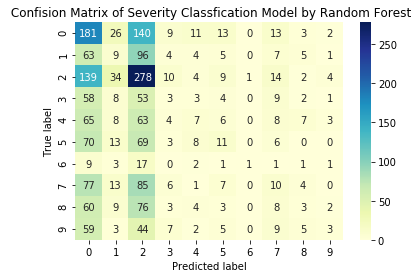

In [61]:
import matplotlib.pyplot as plt
import seaborn as sn
# df_cm = pd.DataFrame(cnf_matrix)
sn.heatmap(cnf_matrix,annot=True, fmt="d", cmap="YlGnBu",linecolor='r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(' Confision Matrix of Severity Classfication Model by Random Forest')

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(min_samples_split=5,min_samples_leaf=5,learning_rate = 0.03,n_estimators =50,max_depth=3)
gb_clf=gb_clf.fit(X_train1,y_train1)

In [116]:
y_test_pred = gb_clf.predict(X_test1)
from sklearn.metrics import classification_report
print (classification_report(y_test1,y_test_pred))

             precision    recall  f1-score   support

          0       0.27      0.37      0.31       420
      0-100       0.11      0.01      0.02       194
   100-1000       0.29      0.80      0.43       539
  1000-2000       0.00      0.00      0.00       152
10000-20000       0.27      0.03      0.05       143
  2000-3000       0.23      0.02      0.03       168
     20000+       0.00      0.00      0.00        30
  3000-5000       0.08      0.00      0.01       217
  5000-7000       0.12      0.01      0.02       143
 7000-10000       0.00      0.00      0.00       117

avg / total       0.19      0.28      0.18      2123



In [118]:
gb_clf.score(X_test1,y_test1)

0.28120584079133304

In [117]:
gb_clf.score(X_train1,y_train1)

0.36826165960024226

In [119]:
from sklearn.externals import joblib
joblib.dump(gb_clf, "severity_model_gb.m")

['severity_model_gb.m']

In [121]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test1,y_test_pred )

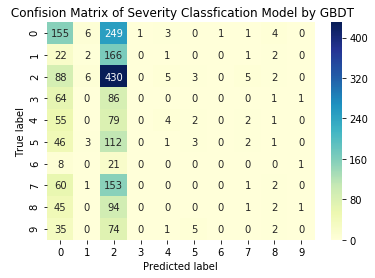

In [122]:
import matplotlib.pyplot as plt
import seaborn as sn
# df_cm = pd.DataFrame(cnf_matrix)
sn.heatmap(cnf_matrix,annot=True, fmt="d", cmap="YlGnBu",linecolor='r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(' Confision Matrix of Severity Classfication Model by GBDT')

In [95]:
import time
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)
X_new = pca.fit_transform(X)

In [65]:
from sklearn.cross_validation import train_test_split
X_train1, X_test1,y_train1, y_test1 = train_test_split(X_new,y,test_size=0.3)

In [93]:
##最后一次调参，n estimators
cv_params = {'n_estimators': [50,80, 100, 150, 200, 300]}
other_params = {'learning_rate': 0.07, 'n_estimators': 100, 'max_depth': 8, 'min_child_weight': 6, 'seed': 0,
                'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0.01, 'reg_lambda': 0.05}

In [97]:
start = time.time()
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator = model, param_grid = cv_params, scoring = 'accuracy', cv = 2, verbose = 1,n_jobs = 1)
optimized_GBM.fit(X_train1, y_train1, eval_set = [(X_train1, y_train1), (X_test1, y_test1)], early_stopping_rounds = 20)
evalute_result = optimized_GBM.grid_scores_

print("Took {} seconds.".format(time.time() - start))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[0]	validation_0-merror:0.700182	validation_1-merror:0.784739
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.646679	validation_1-merror:0.768723
[2]	validation_0-merror:0.617807	validation_1-merror:0.766368
[3]	validation_0-merror:0.590349	validation_1-merror:0.750824
[4]	validation_0-merror:0.56915	validation_1-merror:0.747998
[5]	validation_0-merror:0.555623	validation_1-merror:0.748469
[6]	validation_0-merror:0.549768	validation_1-merror:0.745172
[7]	validation_0-merror:0.535433	validation_1-merror:0.731512
[8]	validation_0-merror:0.520695	validation_1-merror:0.737635
[9]	validation_0-merror:0.513426	validation_1-merror:0.737635
[10]	validation_0-merror:0.501918	validation_1-merror:0.737164
[11]	validation_0-merror:0.499495	validation_1-merror:0.734809
[12]	validation_0-merror:0.49000

[42]	validation_0-merror:0.384817	validation_1-merror:0.733396
[43]	validation_0-merror:0.384212	validation_1-merror:0.729157
Stopping. Best iteration:
[23]	validation_0-merror:0.425197	validation_1-merror:0.728686

[0]	validation_0-merror:0.707652	validation_1-merror:0.799341
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.651726	validation_1-merror:0.768723
[2]	validation_0-merror:0.612962	validation_1-merror:0.7626
[3]	validation_0-merror:0.596002	validation_1-merror:0.749411
[4]	validation_0-merror:0.58187	validation_1-merror:0.742817
[5]	validation_0-merror:0.564304	validation_1-merror:0.742346
[6]	validation_0-merror:0.560872	validation_1-merror:0.736693
[7]	validation_0-merror:0.544518	validation_1-merror:0.741404
[8]	validation_0-merror:0.536241	validation_1-merror:0.736693
[9]	validation_0-merror:0.523521	validation_1-merror:0.742817
[10]

[1]	validation_0-merror:0.646679	validation_1-merror:0.768723
[2]	validation_0-merror:0.617807	validation_1-merror:0.766368
[3]	validation_0-merror:0.590349	validation_1-merror:0.750824
[4]	validation_0-merror:0.56915	validation_1-merror:0.747998
[5]	validation_0-merror:0.555623	validation_1-merror:0.748469
[6]	validation_0-merror:0.549768	validation_1-merror:0.745172
[7]	validation_0-merror:0.535433	validation_1-merror:0.731512
[8]	validation_0-merror:0.520695	validation_1-merror:0.737635
[9]	validation_0-merror:0.513426	validation_1-merror:0.737635
[10]	validation_0-merror:0.501918	validation_1-merror:0.737164
[11]	validation_0-merror:0.499495	validation_1-merror:0.734809
[12]	validation_0-merror:0.490006	validation_1-merror:0.732454
[13]	validation_0-merror:0.479709	validation_1-merror:0.737635
[14]	validation_0-merror:0.470018	validation_1-merror:0.737164
[15]	validation_0-merror:0.466586	validation_1-merror:0.736222
[16]	validation_0-merror:0.463557	validation_1-merror:0.739049
[1

Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.651726	validation_1-merror:0.768723
[2]	validation_0-merror:0.612962	validation_1-merror:0.7626
[3]	validation_0-merror:0.596002	validation_1-merror:0.749411
[4]	validation_0-merror:0.58187	validation_1-merror:0.742817
[5]	validation_0-merror:0.564304	validation_1-merror:0.742346
[6]	validation_0-merror:0.560872	validation_1-merror:0.736693
[7]	validation_0-merror:0.544518	validation_1-merror:0.741404
[8]	validation_0-merror:0.536241	validation_1-merror:0.736693
[9]	validation_0-merror:0.523521	validation_1-merror:0.742817
[10]	validation_0-merror:0.512619	validation_1-merror:0.737164
[11]	validation_0-merror:0.499899	validation_1-merror:0.741875
[12]	validation_0-merror:0.488593	validation_1-merror:0.737635
[13]	validation_0-merror:0.482132	validation_1-merror:0.729157
[14]	validation_0-merror:0.475

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  6.6min finished


[0]	validation_0-merror:0.606501	validation_1-merror:0.786152
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.558449	validation_1-merror:0.753179
[2]	validation_0-merror:0.528367	validation_1-merror:0.74423
[3]	validation_0-merror:0.49788	validation_1-merror:0.737635
[4]	validation_0-merror:0.47446	validation_1-merror:0.736693
[5]	validation_0-merror:0.452453	validation_1-merror:0.724918
[6]	validation_0-merror:0.431658	validation_1-merror:0.723033
[7]	validation_0-merror:0.417323	validation_1-merror:0.723975
[8]	validation_0-merror:0.401979	validation_1-merror:0.725389
[9]	validation_0-merror:0.385221	validation_1-merror:0.717852
[10]	validation_0-merror:0.37553	validation_1-merror:0.719265
[11]	validation_0-merror:0.357359	validation_1-merror:0.722562
[12]	validation_0-merror:0.34363	validation_1-merror:0.724447
[13]	validation_0-merror:0.332122

/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [99]:
cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}

other_params = {'learning_rate': 0.09, 'n_estimators': 50, 'max_depth': 10, 'min_child_weight': 5, 'seed': 0,
                'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0, 'reg_alpha': 0.01, 'reg_lambda': 10}

In [100]:
start = time.time()
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator = model, param_grid = cv_params, scoring = 'accuracy', cv = 2, verbose = 1,n_jobs = 1)
optimized_GBM.fit(X_train1, y_train1, eval_set = [(X_train1, y_train1), (X_test1, y_test1)], early_stopping_rounds = 20)
evalute_result = optimized_GBM.grid_scores_

print("Took {} seconds.".format(time.time() - start))

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[0]	validation_0-merror:0.731274	validation_1-merror:0.752237
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.714718	validation_1-merror:0.733867
[2]	validation_0-merror:0.716939	validation_1-merror:0.722562
[3]	validation_0-merror:0.717141	validation_1-merror:0.729628
[4]	validation_0-merror:0.71169	validation_1-merror:0.723033
[5]	validation_0-merror:0.708258	validation_1-merror:0.715968
[6]	validation_0-merror:0.707854	validation_1-merror:0.715497
[7]	validation_0-merror:0.710478	validation_1-merror:0.71691
[8]	validation_0-merror:0.706441	validation_1-merror:0.719265
[9]	validation_0-merror:0.707248	validation_1-merror:0.717381
[10]	validation_0-merror:0.705229	validation_1-merror:0.718794
[11]	validation_0-merror:0.699576	validation_1-merror:0.715497
[12]	validation_0-merror:0.69998

[29]	validation_0-merror:0.66808	validation_1-merror:0.719265
[30]	validation_0-merror:0.665455	validation_1-merror:0.719265
[31]	validation_0-merror:0.662831	validation_1-merror:0.715026
[32]	validation_0-merror:0.661215	validation_1-merror:0.713142
[33]	validation_0-merror:0.657177	validation_1-merror:0.715497
[34]	validation_0-merror:0.658995	validation_1-merror:0.715026
[35]	validation_0-merror:0.656774	validation_1-merror:0.714555
[36]	validation_0-merror:0.654149	validation_1-merror:0.715968
[37]	validation_0-merror:0.652736	validation_1-merror:0.714084
Stopping. Best iteration:
[17]	validation_0-merror:0.691298	validation_1-merror:0.712671

[0]	validation_0-merror:0.731072	validation_1-merror:0.739049
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.716334	validation_1-merror:0.736222
[2]	validation_0-merror:0.713305	validation_1-merror:0.73

[16]	validation_0-merror:0.696749	validation_1-merror:0.722091
[17]	validation_0-merror:0.693115	validation_1-merror:0.720207
[18]	validation_0-merror:0.690894	validation_1-merror:0.722091
[19]	validation_0-merror:0.690491	validation_1-merror:0.719265
[20]	validation_0-merror:0.688674	validation_1-merror:0.719265
[21]	validation_0-merror:0.685847	validation_1-merror:0.720678
[22]	validation_0-merror:0.685241	validation_1-merror:0.71691
[23]	validation_0-merror:0.685241	validation_1-merror:0.715026
[24]	validation_0-merror:0.68302	validation_1-merror:0.714555
[25]	validation_0-merror:0.681001	validation_1-merror:0.712671
[26]	validation_0-merror:0.679184	validation_1-merror:0.7122
[27]	validation_0-merror:0.677771	validation_1-merror:0.715026
[28]	validation_0-merror:0.67555	validation_1-merror:0.718794
[29]	validation_0-merror:0.67232	validation_1-merror:0.718794
[30]	validation_0-merror:0.668484	validation_1-merror:0.721149
[31]	validation_0-merror:0.666869	validation_1-merror:0.72114

[16]	validation_0-merror:0.69473	validation_1-merror:0.718323
[17]	validation_0-merror:0.695336	validation_1-merror:0.719265
[18]	validation_0-merror:0.694327	validation_1-merror:0.717852
[19]	validation_0-merror:0.690491	validation_1-merror:0.719736
[20]	validation_0-merror:0.689683	validation_1-merror:0.71691
[21]	validation_0-merror:0.690491	validation_1-merror:0.713613
[22]	validation_0-merror:0.688068	validation_1-merror:0.715968
[23]	validation_0-merror:0.68827	validation_1-merror:0.719265
[24]	validation_0-merror:0.684232	validation_1-merror:0.717381
[25]	validation_0-merror:0.681001	validation_1-merror:0.717852
[26]	validation_0-merror:0.680396	validation_1-merror:0.717852
[27]	validation_0-merror:0.677165	validation_1-merror:0.718794
[28]	validation_0-merror:0.672724	validation_1-merror:0.718323
[29]	validation_0-merror:0.669291	validation_1-merror:0.720678
[30]	validation_0-merror:0.668686	validation_1-merror:0.720207
[31]	validation_0-merror:0.66485	validation_1-merror:0.720

[8]	validation_0-merror:0.706642	validation_1-merror:0.72162
[9]	validation_0-merror:0.706037	validation_1-merror:0.724447
[10]	validation_0-merror:0.705633	validation_1-merror:0.720678
[11]	validation_0-merror:0.70321	validation_1-merror:0.72162
[12]	validation_0-merror:0.704018	validation_1-merror:0.723504
[13]	validation_0-merror:0.701999	validation_1-merror:0.722562
[14]	validation_0-merror:0.701191	validation_1-merror:0.718794
[15]	validation_0-merror:0.699172	validation_1-merror:0.718794
[16]	validation_0-merror:0.696951	validation_1-merror:0.715497
[17]	validation_0-merror:0.693519	validation_1-merror:0.717381
[18]	validation_0-merror:0.693519	validation_1-merror:0.717381
[19]	validation_0-merror:0.690692	validation_1-merror:0.718794
[20]	validation_0-merror:0.68726	validation_1-merror:0.717381
[21]	validation_0-merror:0.689077	validation_1-merror:0.71691
[22]	validation_0-merror:0.686453	validation_1-merror:0.71691
[23]	validation_0-merror:0.685847	validation_1-merror:0.718794


[6]	validation_0-merror:0.676358	validation_1-merror:0.722562
[7]	validation_0-merror:0.67131	validation_1-merror:0.722091
[8]	validation_0-merror:0.669695	validation_1-merror:0.723975
[9]	validation_0-merror:0.666465	validation_1-merror:0.723975
[10]	validation_0-merror:0.665859	validation_1-merror:0.72162
[11]	validation_0-merror:0.662023	validation_1-merror:0.72162
[12]	validation_0-merror:0.658187	validation_1-merror:0.724447
[13]	validation_0-merror:0.654351	validation_1-merror:0.722091
[14]	validation_0-merror:0.649909	validation_1-merror:0.724918
[15]	validation_0-merror:0.646275	validation_1-merror:0.724918
[16]	validation_0-merror:0.642237	validation_1-merror:0.725389
[17]	validation_0-merror:0.637795	validation_1-merror:0.731041
[18]	validation_0-merror:0.631335	validation_1-merror:0.729157
[19]	validation_0-merror:0.624268	validation_1-merror:0.72162
[20]	validation_0-merror:0.623259	validation_1-merror:0.726331
[21]	validation_0-merror:0.622249	validation_1-merror:0.723033


[12]	validation_0-merror:0.662225	validation_1-merror:0.71691
[13]	validation_0-merror:0.65637	validation_1-merror:0.7122
[14]	validation_0-merror:0.654553	validation_1-merror:0.714555
[15]	validation_0-merror:0.649102	validation_1-merror:0.716439
[16]	validation_0-merror:0.645669	validation_1-merror:0.71691
[17]	validation_0-merror:0.642843	validation_1-merror:0.717381
[18]	validation_0-merror:0.639209	validation_1-merror:0.717381
[19]	validation_0-merror:0.638603	validation_1-merror:0.713142
[20]	validation_0-merror:0.632546	validation_1-merror:0.71691
[21]	validation_0-merror:0.630729	validation_1-merror:0.715968
[22]	validation_0-merror:0.627095	validation_1-merror:0.717852
[23]	validation_0-merror:0.622855	validation_1-merror:0.716439
[24]	validation_0-merror:0.619019	validation_1-merror:0.717852
[25]	validation_0-merror:0.615385	validation_1-merror:0.718323
[26]	validation_0-merror:0.611952	validation_1-merror:0.718323
[27]	validation_0-merror:0.606299	validation_1-merror:0.71691

[29]	validation_0-merror:0.603473	validation_1-merror:0.723504
[30]	validation_0-merror:0.601454	validation_1-merror:0.724447
Stopping. Best iteration:
[10]	validation_0-merror:0.672724	validation_1-merror:0.72162

[0]	validation_0-merror:0.721179	validation_1-merror:0.73952
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.702604	validation_1-merror:0.739049
[2]	validation_0-merror:0.697759	validation_1-merror:0.731512
[3]	validation_0-merror:0.692711	validation_1-merror:0.72586
[4]	validation_0-merror:0.690894	validation_1-merror:0.72586
[5]	validation_0-merror:0.689885	validation_1-merror:0.726331
[6]	validation_0-merror:0.686655	validation_1-merror:0.722562
[7]	validation_0-merror:0.685443	validation_1-merror:0.723975
[8]	validation_0-merror:0.683222	validation_1-merror:0.727744
[9]	validation_0-merror:0.681203	validation_1-merror:0.725389
[10]	

[31]	validation_0-merror:0.602059	validation_1-merror:0.7122
[32]	validation_0-merror:0.598425	validation_1-merror:0.713142
[33]	validation_0-merror:0.596204	validation_1-merror:0.713613
[34]	validation_0-merror:0.593378	validation_1-merror:0.715026
[35]	validation_0-merror:0.588128	validation_1-merror:0.714084
[36]	validation_0-merror:0.584898	validation_1-merror:0.715497
[37]	validation_0-merror:0.581668	validation_1-merror:0.712671
[38]	validation_0-merror:0.576418	validation_1-merror:0.7122
[39]	validation_0-merror:0.574803	validation_1-merror:0.707489
[40]	validation_0-merror:0.570563	validation_1-merror:0.708902
[41]	validation_0-merror:0.567131	validation_1-merror:0.70796
[42]	validation_0-merror:0.564708	validation_1-merror:0.708431
[43]	validation_0-merror:0.561074	validation_1-merror:0.709374
[44]	validation_0-merror:0.55421	validation_1-merror:0.708902
[45]	validation_0-merror:0.550777	validation_1-merror:0.714555
[46]	validation_0-merror:0.546941	validation_1-merror:0.7122


[18]	validation_0-merror:0.56592	validation_1-merror:0.72586
[19]	validation_0-merror:0.557844	validation_1-merror:0.722562
[20]	validation_0-merror:0.55421	validation_1-merror:0.724918
[21]	validation_0-merror:0.548355	validation_1-merror:0.723033
[22]	validation_0-merror:0.541288	validation_1-merror:0.723033
[23]	validation_0-merror:0.536846	validation_1-merror:0.724918
[24]	validation_0-merror:0.531395	validation_1-merror:0.725389
[25]	validation_0-merror:0.526751	validation_1-merror:0.728215
[26]	validation_0-merror:0.5213	validation_1-merror:0.727744
[27]	validation_0-merror:0.516858	validation_1-merror:0.72586
[28]	validation_0-merror:0.510802	validation_1-merror:0.72586
[29]	validation_0-merror:0.503331	validation_1-merror:0.724918
[30]	validation_0-merror:0.499899	validation_1-merror:0.72586
[31]	validation_0-merror:0.495659	validation_1-merror:0.723504
[32]	validation_0-merror:0.489602	validation_1-merror:0.723975
[33]	validation_0-merror:0.481728	validation_1-merror:0.724447


[18]	validation_0-merror:0.575207	validation_1-merror:0.711729
[19]	validation_0-merror:0.568948	validation_1-merror:0.709845
[20]	validation_0-merror:0.563699	validation_1-merror:0.710787
[21]	validation_0-merror:0.55643	validation_1-merror:0.710316
[22]	validation_0-merror:0.548153	validation_1-merror:0.711729
[23]	validation_0-merror:0.540682	validation_1-merror:0.712671
[24]	validation_0-merror:0.535231	validation_1-merror:0.715026
[25]	validation_0-merror:0.530184	validation_1-merror:0.716439
[26]	validation_0-merror:0.522713	validation_1-merror:0.712671
[27]	validation_0-merror:0.51706	validation_1-merror:0.713142
[28]	validation_0-merror:0.513224	validation_1-merror:0.712671
[29]	validation_0-merror:0.509186	validation_1-merror:0.715026
[30]	validation_0-merror:0.503331	validation_1-merror:0.715968
[31]	validation_0-merror:0.500101	validation_1-merror:0.718794
[32]	validation_0-merror:0.493438	validation_1-merror:0.719736
[33]	validation_0-merror:0.489602	validation_1-merror:0.7

[19]	validation_0-merror:0.589138	validation_1-merror:0.728686
[20]	validation_0-merror:0.582677	validation_1-merror:0.727744
[21]	validation_0-merror:0.577832	validation_1-merror:0.727744
[22]	validation_0-merror:0.573996	validation_1-merror:0.723504
[23]	validation_0-merror:0.570159	validation_1-merror:0.725389
[24]	validation_0-merror:0.561478	validation_1-merror:0.721149
[25]	validation_0-merror:0.557036	validation_1-merror:0.724447
[26]	validation_0-merror:0.54896	validation_1-merror:0.720678
[27]	validation_0-merror:0.546941	validation_1-merror:0.718794
[28]	validation_0-merror:0.539875	validation_1-merror:0.723033
[29]	validation_0-merror:0.532405	validation_1-merror:0.722091
[30]	validation_0-merror:0.525338	validation_1-merror:0.720678
[31]	validation_0-merror:0.523319	validation_1-merror:0.720207
[32]	validation_0-merror:0.518676	validation_1-merror:0.719265
[33]	validation_0-merror:0.510802	validation_1-merror:0.719736
[34]	validation_0-merror:0.507571	validation_1-merror:0.

[17]	validation_0-merror:0.601454	validation_1-merror:0.717381
[18]	validation_0-merror:0.598223	validation_1-merror:0.715497
[19]	validation_0-merror:0.593176	validation_1-merror:0.71691
[20]	validation_0-merror:0.585908	validation_1-merror:0.716439
[21]	validation_0-merror:0.580254	validation_1-merror:0.717381
[22]	validation_0-merror:0.573592	validation_1-merror:0.715968
[23]	validation_0-merror:0.567939	validation_1-merror:0.716439
[24]	validation_0-merror:0.565314	validation_1-merror:0.71691
[25]	validation_0-merror:0.556027	validation_1-merror:0.717852
[26]	validation_0-merror:0.550575	validation_1-merror:0.71691
[27]	validation_0-merror:0.54573	validation_1-merror:0.717381
[28]	validation_0-merror:0.541086	validation_1-merror:0.718794
[29]	validation_0-merror:0.536241	validation_1-merror:0.717852
[30]	validation_0-merror:0.529578	validation_1-merror:0.716439
[31]	validation_0-merror:0.524934	validation_1-merror:0.72162
[32]	validation_0-merror:0.522108	validation_1-merror:0.7206

[18]	validation_0-merror:0.507369	validation_1-merror:0.73057
[19]	validation_0-merror:0.501716	validation_1-merror:0.731041
[20]	validation_0-merror:0.496063	validation_1-merror:0.731041
[21]	validation_0-merror:0.491621	validation_1-merror:0.732454
[22]	validation_0-merror:0.48294	validation_1-merror:0.728215
[23]	validation_0-merror:0.480517	validation_1-merror:0.727273
[24]	validation_0-merror:0.476883	validation_1-merror:0.727273
[25]	validation_0-merror:0.471835	validation_1-merror:0.73057
[26]	validation_0-merror:0.467595	validation_1-merror:0.728686
[27]	validation_0-merror:0.459923	validation_1-merror:0.729628
[28]	validation_0-merror:0.456087	validation_1-merror:0.729628
[29]	validation_0-merror:0.450636	validation_1-merror:0.730099
[30]	validation_0-merror:0.446598	validation_1-merror:0.728686
[31]	validation_0-merror:0.441349	validation_1-merror:0.72586
[32]	validation_0-merror:0.435897	validation_1-merror:0.72586
[33]	validation_0-merror:0.431456	validation_1-merror:0.7291

[11]	validation_0-merror:0.572178	validation_1-merror:0.72586
[12]	validation_0-merror:0.565112	validation_1-merror:0.724918
[13]	validation_0-merror:0.555219	validation_1-merror:0.724447
[14]	validation_0-merror:0.552796	validation_1-merror:0.726802
[15]	validation_0-merror:0.545932	validation_1-merror:0.723504
[16]	validation_0-merror:0.536846	validation_1-merror:0.723033
[17]	validation_0-merror:0.527963	validation_1-merror:0.724447
[18]	validation_0-merror:0.524329	validation_1-merror:0.727744
[19]	validation_0-merror:0.514032	validation_1-merror:0.723975
[20]	validation_0-merror:0.506764	validation_1-merror:0.722562
[21]	validation_0-merror:0.496669	validation_1-merror:0.72586
[22]	validation_0-merror:0.488997	validation_1-merror:0.723975
[23]	validation_0-merror:0.48294	validation_1-merror:0.721149
[24]	validation_0-merror:0.479305	validation_1-merror:0.724447
[25]	validation_0-merror:0.469211	validation_1-merror:0.722562
[26]	validation_0-merror:0.462346	validation_1-merror:0.72

[36]	validation_0-merror:0.427822	validation_1-merror:0.722091
[37]	validation_0-merror:0.422572	validation_1-merror:0.719736
[38]	validation_0-merror:0.418736	validation_1-merror:0.719736
[39]	validation_0-merror:0.413487	validation_1-merror:0.719265
Stopping. Best iteration:
[19]	validation_0-merror:0.520291	validation_1-merror:0.71691

[0]	validation_0-merror:0.707652	validation_1-merror:0.769666
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.678377	validation_1-merror:0.74894
[2]	validation_0-merror:0.655562	validation_1-merror:0.736693
[3]	validation_0-merror:0.644458	validation_1-merror:0.747527
[4]	validation_0-merror:0.638199	validation_1-merror:0.737635
[5]	validation_0-merror:0.632142	validation_1-merror:0.738106
[6]	validation_0-merror:0.625076	validation_1-merror:0.726331
[7]	validation_0-merror:0.62124	validation_1-merror:0.726331
[8

[24]	validation_0-merror:0.515849	validation_1-merror:0.72162
[25]	validation_0-merror:0.508984	validation_1-merror:0.728215
[26]	validation_0-merror:0.503129	validation_1-merror:0.72162
[27]	validation_0-merror:0.499899	validation_1-merror:0.722562
[28]	validation_0-merror:0.496265	validation_1-merror:0.723504
[29]	validation_0-merror:0.487785	validation_1-merror:0.724918
[30]	validation_0-merror:0.481526	validation_1-merror:0.723975
[31]	validation_0-merror:0.477892	validation_1-merror:0.722562
[32]	validation_0-merror:0.475469	validation_1-merror:0.723504
[33]	validation_0-merror:0.469211	validation_1-merror:0.722562
[34]	validation_0-merror:0.46699	validation_1-merror:0.723975
[35]	validation_0-merror:0.462548	validation_1-merror:0.723975
[36]	validation_0-merror:0.459116	validation_1-merror:0.719736
[37]	validation_0-merror:0.453059	validation_1-merror:0.723975
[38]	validation_0-merror:0.448617	validation_1-merror:0.723504
[39]	validation_0-merror:0.442964	validation_1-merror:0.72

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.631738	validation_1-merror:0.743759
[2]	validation_0-merror:0.602261	validation_1-merror:0.741404
[3]	validation_0-merror:0.591359	validation_1-merror:0.737164
[4]	validation_0-merror:0.578235	validation_1-merror:0.739991
[5]	validation_0-merror:0.566122	validation_1-merror:0.732454
[6]	validation_0-merror:0.557238	validation_1-merror:0.729628
[7]	validation_0-merror:0.541288	validation_1-merror:0.726802
[8]	validation_0-merror:0.527155	validation_1-merror:0.725389
[9]	validation_0-merror:0.518474	validation_1-merror:0.716439
[10]	validation_0-merror:0.510398	validation_1-merror:0.719265
[11]	validation_0-merror:0.497678	validation_1-merror:0.72162
[12]	validation_0-merror:0.493842	validation_1-merror:0.719265
[13]	validation_0-merror:0.485564	validation_1-merror:0.717381
[14]	validation_0-merror:0.475671	validation_1-merror:0.721149
[15]	validation_0-merror:0.466586	validation_1-merror:0.72256

[6]	validation_0-merror:0.583283	validation_1-merror:0.73057
[7]	validation_0-merror:0.569756	validation_1-merror:0.733867
[8]	validation_0-merror:0.558248	validation_1-merror:0.733867
[9]	validation_0-merror:0.547345	validation_1-merror:0.734338
[10]	validation_0-merror:0.541894	validation_1-merror:0.728215
[11]	validation_0-merror:0.536846	validation_1-merror:0.725389
[12]	validation_0-merror:0.525136	validation_1-merror:0.724918
[13]	validation_0-merror:0.518474	validation_1-merror:0.724918
[14]	validation_0-merror:0.510196	validation_1-merror:0.724918
[15]	validation_0-merror:0.503533	validation_1-merror:0.72162
[16]	validation_0-merror:0.492631	validation_1-merror:0.727273
[17]	validation_0-merror:0.485766	validation_1-merror:0.729628
[18]	validation_0-merror:0.482132	validation_1-merror:0.732454
[19]	validation_0-merror:0.475469	validation_1-merror:0.731983
[20]	validation_0-merror:0.466384	validation_1-merror:0.73057
[21]	validation_0-merror:0.461942	validation_1-merror:0.728686

[7]	validation_0-merror:0.581062	validation_1-merror:0.733396
[8]	validation_0-merror:0.572582	validation_1-merror:0.732925
[9]	validation_0-merror:0.565718	validation_1-merror:0.735751
[10]	validation_0-merror:0.555219	validation_1-merror:0.732925
[11]	validation_0-merror:0.544922	validation_1-merror:0.735751
[12]	validation_0-merror:0.538663	validation_1-merror:0.737164
[13]	validation_0-merror:0.52978	validation_1-merror:0.733867
[14]	validation_0-merror:0.518474	validation_1-merror:0.734809
[15]	validation_0-merror:0.513022	validation_1-merror:0.731512
[16]	validation_0-merror:0.509186	validation_1-merror:0.730099
[17]	validation_0-merror:0.501312	validation_1-merror:0.732454
[18]	validation_0-merror:0.492631	validation_1-merror:0.730099
[19]	validation_0-merror:0.483545	validation_1-merror:0.728215
[20]	validation_0-merror:0.47123	validation_1-merror:0.733396
[21]	validation_0-merror:0.465576	validation_1-merror:0.728215
[22]	validation_0-merror:0.459519	validation_1-merror:0.7268

[0]	validation_0-merror:0.707854	validation_1-merror:0.770137
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.665253	validation_1-merror:0.74894
[2]	validation_0-merror:0.647486	validation_1-merror:0.736693
[3]	validation_0-merror:0.634969	validation_1-merror:0.737635
[4]	validation_0-merror:0.623461	validation_1-merror:0.737635
[5]	validation_0-merror:0.617	validation_1-merror:0.739049
[6]	validation_0-merror:0.613366	validation_1-merror:0.727273
[7]	validation_0-merror:0.60428	validation_1-merror:0.731983
[8]	validation_0-merror:0.589542	validation_1-merror:0.736222
[9]	validation_0-merror:0.582879	validation_1-merror:0.730099
[10]	validation_0-merror:0.573794	validation_1-merror:0.733396
[11]	validation_0-merror:0.569554	validation_1-merror:0.728686
[12]	validation_0-merror:0.564506	validation_1-merror:0.731983
[13]	validation_0-merror:0.556632

[24]	validation_0-merror:0.409853	validation_1-merror:0.727273
[25]	validation_0-merror:0.405815	validation_1-merror:0.729157
[26]	validation_0-merror:0.404603	validation_1-merror:0.72586
[27]	validation_0-merror:0.401777	validation_1-merror:0.727273
[28]	validation_0-merror:0.397739	validation_1-merror:0.723975
[29]	validation_0-merror:0.395922	validation_1-merror:0.727273
[30]	validation_0-merror:0.392691	validation_1-merror:0.727273
[31]	validation_0-merror:0.39047	validation_1-merror:0.731041
[32]	validation_0-merror:0.388653	validation_1-merror:0.731041
[33]	validation_0-merror:0.386231	validation_1-merror:0.731512
[34]	validation_0-merror:0.385019	validation_1-merror:0.733396
[35]	validation_0-merror:0.383808	validation_1-merror:0.731983
[36]	validation_0-merror:0.382798	validation_1-merror:0.732454
Stopping. Best iteration:
[16]	validation_0-merror:0.442762	validation_1-merror:0.717852

[0]	validation_0-merror:0.662629	validation_1-merror:0.765897
Multiple eval metrics have been

[36]	validation_0-merror:0.379164	validation_1-merror:0.726331
[37]	validation_0-merror:0.377549	validation_1-merror:0.727744
[38]	validation_0-merror:0.375934	validation_1-merror:0.722562
Stopping. Best iteration:
[18]	validation_0-merror:0.435897	validation_1-merror:0.720207

[0]	validation_0-merror:0.678377	validation_1-merror:0.777673
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.634767	validation_1-merror:0.754593
[2]	validation_0-merror:0.611549	validation_1-merror:0.743759
[3]	validation_0-merror:0.597416	validation_1-merror:0.747056
[4]	validation_0-merror:0.581668	validation_1-merror:0.742346
[5]	validation_0-merror:0.568342	validation_1-merror:0.743288
[6]	validation_0-merror:0.555421	validation_1-merror:0.73528
[7]	validation_0-merror:0.54472	validation_1-merror:0.731983
[8]	validation_0-merror:0.53826	validation_1-merror:0.729628
[9]

[34]	validation_0-merror:0.403998	validation_1-merror:0.730099
[35]	validation_0-merror:0.400969	validation_1-merror:0.73057
Stopping. Best iteration:
[15]	validation_0-merror:0.49889	validation_1-merror:0.723033

[0]	validation_0-merror:0.686251	validation_1-merror:0.770137
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.650313	validation_1-merror:0.747056
[2]	validation_0-merror:0.62124	validation_1-merror:0.733867
[3]	validation_0-merror:0.604482	validation_1-merror:0.741404
[4]	validation_0-merror:0.598627	validation_1-merror:0.73528
[5]	validation_0-merror:0.588128	validation_1-merror:0.733396
[6]	validation_0-merror:0.581264	validation_1-merror:0.739049
[7]	validation_0-merror:0.56915	validation_1-merror:0.739049
[8]	validation_0-merror:0.557036	validation_1-merror:0.738106
[9]	validation_0-merror:0.548758	validation_1-merror:0.73528
[10]	va

[24]	validation_0-merror:0.443771	validation_1-merror:0.719265
[25]	validation_0-merror:0.436099	validation_1-merror:0.721149
[26]	validation_0-merror:0.429235	validation_1-merror:0.723033
[27]	validation_0-merror:0.423985	validation_1-merror:0.717381
[28]	validation_0-merror:0.420351	validation_1-merror:0.716439
[29]	validation_0-merror:0.417121	validation_1-merror:0.719736
[30]	validation_0-merror:0.411064	validation_1-merror:0.717852
[31]	validation_0-merror:0.406622	validation_1-merror:0.717381
[32]	validation_0-merror:0.406017	validation_1-merror:0.715968
[33]	validation_0-merror:0.401777	validation_1-merror:0.716439
[34]	validation_0-merror:0.398143	validation_1-merror:0.718323
[35]	validation_0-merror:0.395114	validation_1-merror:0.718323
[36]	validation_0-merror:0.395316	validation_1-merror:0.718323
[37]	validation_0-merror:0.393701	validation_1-merror:0.714555
[38]	validation_0-merror:0.389461	validation_1-merror:0.715497
[39]	validation_0-merror:0.386231	validation_1-merror:0

Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.594993	validation_1-merror:0.760245
[2]	validation_0-merror:0.557844	validation_1-merror:0.742817
[3]	validation_0-merror:0.536039	validation_1-merror:0.751766
[4]	validation_0-merror:0.526348	validation_1-merror:0.744701
[5]	validation_0-merror:0.5106	validation_1-merror:0.737635
[6]	validation_0-merror:0.50212	validation_1-merror:0.742346
[7]	validation_0-merror:0.495659	validation_1-merror:0.73528
[8]	validation_0-merror:0.484555	validation_1-merror:0.734809
[9]	validation_0-merror:0.47769	validation_1-merror:0.730099
[10]	validation_0-merror:0.467999	validation_1-merror:0.729157
[11]	validation_0-merror:0.462144	validation_1-merror:0.731041
[12]	validation_0-merror:0.454068	validation_1-merror:0.732925
[13]	validation_0-merror:0.448617	validation_1-merror:0.729628
[14]	validation_0-merror:0.44033

[5]	validation_0-merror:0.538865	validation_1-merror:0.73057
[6]	validation_0-merror:0.521906	validation_1-merror:0.731041
[7]	validation_0-merror:0.508177	validation_1-merror:0.729157
[8]	validation_0-merror:0.501514	validation_1-merror:0.731983
[9]	validation_0-merror:0.493842	validation_1-merror:0.729628
[10]	validation_0-merror:0.481728	validation_1-merror:0.729157
[11]	validation_0-merror:0.472239	validation_1-merror:0.726331
[12]	validation_0-merror:0.464567	validation_1-merror:0.723504
[13]	validation_0-merror:0.457097	validation_1-merror:0.726331
[14]	validation_0-merror:0.447608	validation_1-merror:0.722562
[15]	validation_0-merror:0.440743	validation_1-merror:0.724447
[16]	validation_0-merror:0.433878	validation_1-merror:0.727273
[17]	validation_0-merror:0.425803	validation_1-merror:0.726331
[18]	validation_0-merror:0.41914	validation_1-merror:0.72586
[19]	validation_0-merror:0.41167	validation_1-merror:0.730099
[20]	validation_0-merror:0.40743	validation_1-merror:0.724447
[2

[8]	validation_0-merror:0.544115	validation_1-merror:0.738577
[9]	validation_0-merror:0.535837	validation_1-merror:0.729157
[10]	validation_0-merror:0.523117	validation_1-merror:0.731512
[11]	validation_0-merror:0.516455	validation_1-merror:0.734338
[12]	validation_0-merror:0.505552	validation_1-merror:0.733867
[13]	validation_0-merror:0.499091	validation_1-merror:0.731041
[14]	validation_0-merror:0.492833	validation_1-merror:0.732454
[15]	validation_0-merror:0.48516	validation_1-merror:0.731041
[16]	validation_0-merror:0.473652	validation_1-merror:0.730099
[17]	validation_0-merror:0.464971	validation_1-merror:0.732454
[18]	validation_0-merror:0.459318	validation_1-merror:0.729628
[19]	validation_0-merror:0.45528	validation_1-merror:0.730099
[20]	validation_0-merror:0.448617	validation_1-merror:0.729157
[21]	validation_0-merror:0.442358	validation_1-merror:0.733396
[22]	validation_0-merror:0.435696	validation_1-merror:0.731512
[23]	validation_0-merror:0.432667	validation_1-merror:0.729

[4]	validation_0-merror:0.598223	validation_1-merror:0.730099
[5]	validation_0-merror:0.589542	validation_1-merror:0.731041
[6]	validation_0-merror:0.58086	validation_1-merror:0.725389
[7]	validation_0-merror:0.565718	validation_1-merror:0.718323
[8]	validation_0-merror:0.558248	validation_1-merror:0.719265
[9]	validation_0-merror:0.549162	validation_1-merror:0.72162
[10]	validation_0-merror:0.538462	validation_1-merror:0.721149
[11]	validation_0-merror:0.527155	validation_1-merror:0.719265
[12]	validation_0-merror:0.519887	validation_1-merror:0.719736
[13]	validation_0-merror:0.510398	validation_1-merror:0.723033
[14]	validation_0-merror:0.498082	validation_1-merror:0.723033
[15]	validation_0-merror:0.495255	validation_1-merror:0.722562
[16]	validation_0-merror:0.484353	validation_1-merror:0.719736
[17]	validation_0-merror:0.477488	validation_1-merror:0.717852
[18]	validation_0-merror:0.470422	validation_1-merror:0.717852
[19]	validation_0-merror:0.462144	validation_1-merror:0.720678


[38]	validation_0-merror:0.392893	validation_1-merror:0.727273
[39]	validation_0-merror:0.389461	validation_1-merror:0.727744
Stopping. Best iteration:
[19]	validation_0-merror:0.479911	validation_1-merror:0.720207

[0]	validation_0-merror:0.635776	validation_1-merror:0.779557
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.585706	validation_1-merror:0.760716
[2]	validation_0-merror:0.547345	validation_1-merror:0.746585
[3]	validation_0-merror:0.526348	validation_1-merror:0.74423
[4]	validation_0-merror:0.5106	validation_1-merror:0.743288
[5]	validation_0-merror:0.502524	validation_1-merror:0.737164
[6]	validation_0-merror:0.492631	validation_1-merror:0.739991
[7]	validation_0-merror:0.484151	validation_1-merror:0.736693
[8]	validation_0-merror:0.474258	validation_1-merror:0.738106
[9]	validation_0-merror:0.465173	validation_1-merror:0.732454
[10]

[33]	validation_0-merror:0.382193	validation_1-merror:0.721149
[34]	validation_0-merror:0.37977	validation_1-merror:0.723504
[35]	validation_0-merror:0.380174	validation_1-merror:0.72586
[36]	validation_0-merror:0.379366	validation_1-merror:0.724918
[37]	validation_0-merror:0.377751	validation_1-merror:0.724918
[38]	validation_0-merror:0.376539	validation_1-merror:0.723975
[39]	validation_0-merror:0.376943	validation_1-merror:0.726802
[40]	validation_0-merror:0.376539	validation_1-merror:0.724918
[41]	validation_0-merror:0.377145	validation_1-merror:0.724918
[42]	validation_0-merror:0.377347	validation_1-merror:0.726802
[43]	validation_0-merror:0.377145	validation_1-merror:0.723975
Stopping. Best iteration:
[23]	validation_0-merror:0.400363	validation_1-merror:0.718794

[0]	validation_0-merror:0.657379	validation_1-merror:0.770137
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 ro

[11]	validation_0-merror:0.490814	validation_1-merror:0.737164
[12]	validation_0-merror:0.480113	validation_1-merror:0.739991
[13]	validation_0-merror:0.467999	validation_1-merror:0.735751
[14]	validation_0-merror:0.458712	validation_1-merror:0.736222
[15]	validation_0-merror:0.452251	validation_1-merror:0.735751
[16]	validation_0-merror:0.444781	validation_1-merror:0.732925
[17]	validation_0-merror:0.442964	validation_1-merror:0.731983
[18]	validation_0-merror:0.435696	validation_1-merror:0.73528
[19]	validation_0-merror:0.428629	validation_1-merror:0.734809
[20]	validation_0-merror:0.423178	validation_1-merror:0.736693
[21]	validation_0-merror:0.415304	validation_1-merror:0.736222
[22]	validation_0-merror:0.408641	validation_1-merror:0.738106
[23]	validation_0-merror:0.403392	validation_1-merror:0.739049
[24]	validation_0-merror:0.399152	validation_1-merror:0.736693
[25]	validation_0-merror:0.396124	validation_1-merror:0.735751
[26]	validation_0-merror:0.391884	validation_1-merror:0.

[17]	validation_0-merror:0.476479	validation_1-merror:0.728215
[18]	validation_0-merror:0.469412	validation_1-merror:0.73057
[19]	validation_0-merror:0.463961	validation_1-merror:0.729628
[20]	validation_0-merror:0.45528	validation_1-merror:0.728686
[21]	validation_0-merror:0.451242	validation_1-merror:0.728215
[22]	validation_0-merror:0.445589	validation_1-merror:0.727273
[23]	validation_0-merror:0.440541	validation_1-merror:0.726802
[24]	validation_0-merror:0.433273	validation_1-merror:0.72586
[25]	validation_0-merror:0.428225	validation_1-merror:0.723504
[26]	validation_0-merror:0.425197	validation_1-merror:0.724447
[27]	validation_0-merror:0.421563	validation_1-merror:0.724918
[28]	validation_0-merror:0.417929	validation_1-merror:0.723033
[29]	validation_0-merror:0.413891	validation_1-merror:0.723033
[30]	validation_0-merror:0.412073	validation_1-merror:0.719265
[31]	validation_0-merror:0.409449	validation_1-merror:0.723975
[32]	validation_0-merror:0.407632	validation_1-merror:0.72

[13]	validation_0-merror:0.509186	validation_1-merror:0.728686
[14]	validation_0-merror:0.504341	validation_1-merror:0.723033
[15]	validation_0-merror:0.494448	validation_1-merror:0.72162
[16]	validation_0-merror:0.489804	validation_1-merror:0.723975
[17]	validation_0-merror:0.480921	validation_1-merror:0.724918
[18]	validation_0-merror:0.472845	validation_1-merror:0.724447
[19]	validation_0-merror:0.467393	validation_1-merror:0.720207
[20]	validation_0-merror:0.459923	validation_1-merror:0.72162
[21]	validation_0-merror:0.452857	validation_1-merror:0.725389
[22]	validation_0-merror:0.448415	validation_1-merror:0.723033
[23]	validation_0-merror:0.44256	validation_1-merror:0.724447
[24]	validation_0-merror:0.43832	validation_1-merror:0.724918
[25]	validation_0-merror:0.43085	validation_1-merror:0.719736
[26]	validation_0-merror:0.427822	validation_1-merror:0.719265
[27]	validation_0-merror:0.424187	validation_1-merror:0.717852
[28]	validation_0-merror:0.418938	validation_1-merror:0.7187

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 58.0min finished


[0]	validation_0-merror:0.716737	validation_1-merror:0.725389
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.718352	validation_1-merror:0.726331
[2]	validation_0-merror:0.71492	validation_1-merror:0.724918
[3]	validation_0-merror:0.714516	validation_1-merror:0.727273
[4]	validation_0-merror:0.711892	validation_1-merror:0.720207
[5]	validation_0-merror:0.71169	validation_1-merror:0.714555
[6]	validation_0-merror:0.710277	validation_1-merror:0.713613
[7]	validation_0-merror:0.708459	validation_1-merror:0.713142
[8]	validation_0-merror:0.708459	validation_1-merror:0.716439
[9]	validation_0-merror:0.707046	validation_1-merror:0.715968
[10]	validation_0-merror:0.70745	validation_1-merror:0.714555
[11]	validation_0-merror:0.706239	validation_1-merror:0.714555
[12]	validation_0-merror:0.706239	validation_1-merror:0.711729
[13]	validation_0-merror:0.7034

/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [101]:
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

每轮迭代运行结果:[mean: 0.26267, std: 0.00612, params: {'max_depth': 3, 'min_child_weight': 1}, mean: 0.26247, std: 0.00632, params: {'max_depth': 3, 'min_child_weight': 2}, mean: 0.26610, std: 0.00592, params: {'max_depth': 3, 'min_child_weight': 3}, mean: 0.26428, std: 0.00087, params: {'max_depth': 3, 'min_child_weight': 4}, mean: 0.26368, std: 0.00713, params: {'max_depth': 3, 'min_child_weight': 5}, mean: 0.26590, std: 0.00612, params: {'max_depth': 3, 'min_child_weight': 6}, mean: 0.26590, std: 0.00855, params: {'max_depth': 4, 'min_child_weight': 1}, mean: 0.25883, std: 0.00591, params: {'max_depth': 4, 'min_child_weight': 2}, mean: 0.26065, std: 0.00410, params: {'max_depth': 4, 'min_child_weight': 3}, mean: 0.26449, std: 0.00511, params: {'max_depth': 4, 'min_child_weight': 4}, mean: 0.26247, std: 0.00834, params: {'max_depth': 4, 'min_child_weight': 5}, mean: 0.25924, std: 0.00591, params: {'max_depth': 4, 'min_child_weight': 6}, mean: 0.26348, std: 0.00289, params: {'max_depth': 5, 

In [98]:
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

每轮迭代运行结果:[mean: 0.25237, std: 0.00268, params: {'n_estimators': 50}, mean: 0.25237, std: 0.00268, params: {'n_estimators': 80}, mean: 0.25237, std: 0.00268, params: {'n_estimators': 100}, mean: 0.25237, std: 0.00268, params: {'n_estimators': 150}, mean: 0.25237, std: 0.00268, params: {'n_estimators': 200}, mean: 0.25237, std: 0.00268, params: {'n_estimators': 300}]
参数的最佳取值：{'n_estimators': 50}
最佳模型得分:0.2523722996163941


In [102]:
##最后一次调参，leanrning rate
cv_params = {'learning_rate': [0.01,0.03,0.05,0.07,0.09,0.1]}
other_params = {'learning_rate': 0.09, 'n_estimators': 50, 'max_depth': 3, 'min_child_weight': 3, 'seed': 0,
                'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0.01, 'reg_lambda': 0.05}

In [103]:
start = time.time()
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator = model, param_grid = cv_params, scoring = 'accuracy', cv = 2, verbose = 1,n_jobs = 1)
optimized_GBM.fit(X_train1, y_train1, eval_set = [(X_train1, y_train1), (X_test1, y_test1)], early_stopping_rounds = 20)
evalute_result = optimized_GBM.grid_scores_

print("Took {} seconds.".format(time.time() - start))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[0]	validation_0-merror:0.72764	validation_1-merror:0.761187
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.716132	validation_1-merror:0.759303
[2]	validation_0-merror:0.708863	validation_1-merror:0.745172
[3]	validation_0-merror:0.701999	validation_1-merror:0.737164
[4]	validation_0-merror:0.699172	validation_1-merror:0.737164
[5]	validation_0-merror:0.699172	validation_1-merror:0.737164
[6]	validation_0-merror:0.699576	validation_1-merror:0.726802
[7]	validation_0-merror:0.702201	validation_1-merror:0.725389
[8]	validation_0-merror:0.705027	validation_1-merror:0.725389
[9]	validation_0-merror:0.701999	validation_1-merror:0.726331
[10]	validation_0-merror:0.704623	validation_1-merror:0.726331
[11]	validation_0-merror:0.702806	validation_1-merror:0.726331
[12]	validation_0-merror:0.70119

[23]	validation_0-merror:0.682415	validation_1-merror:0.723033
[24]	validation_0-merror:0.684232	validation_1-merror:0.72162
[25]	validation_0-merror:0.681001	validation_1-merror:0.721149
[26]	validation_0-merror:0.676762	validation_1-merror:0.722562
[27]	validation_0-merror:0.678377	validation_1-merror:0.720207
[28]	validation_0-merror:0.676963	validation_1-merror:0.720678
[29]	validation_0-merror:0.675146	validation_1-merror:0.719265
[30]	validation_0-merror:0.673531	validation_1-merror:0.718323
[31]	validation_0-merror:0.673127	validation_1-merror:0.720207
[32]	validation_0-merror:0.673935	validation_1-merror:0.720678
[33]	validation_0-merror:0.672522	validation_1-merror:0.720678
[34]	validation_0-merror:0.673329	validation_1-merror:0.717381
[35]	validation_0-merror:0.671916	validation_1-merror:0.717852
[36]	validation_0-merror:0.671512	validation_1-merror:0.716439
[37]	validation_0-merror:0.673329	validation_1-merror:0.717852
[38]	validation_0-merror:0.668888	validation_1-merror:0.

[48]	validation_0-merror:0.634767	validation_1-merror:0.714555
[49]	validation_0-merror:0.63295	validation_1-merror:0.7122
[0]	validation_0-merror:0.737129	validation_1-merror:0.760716
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.714718	validation_1-merror:0.74423
[2]	validation_0-merror:0.714516	validation_1-merror:0.742346
[3]	validation_0-merror:0.711488	validation_1-merror:0.736222
[4]	validation_0-merror:0.707854	validation_1-merror:0.727273
[5]	validation_0-merror:0.703008	validation_1-merror:0.729628
[6]	validation_0-merror:0.706441	validation_1-merror:0.730099
[7]	validation_0-merror:0.704623	validation_1-merror:0.724918
[8]	validation_0-merror:0.699172	validation_1-merror:0.724447
[9]	validation_0-merror:0.696346	validation_1-merror:0.723033
[10]	validation_0-merror:0.692711	validation_1-merror:0.722091
[11]	validation_0-merror:0.69210

[26]	validation_0-merror:0.667474	validation_1-merror:0.715968
[27]	validation_0-merror:0.662427	validation_1-merror:0.714555
[28]	validation_0-merror:0.660812	validation_1-merror:0.715026
[29]	validation_0-merror:0.657379	validation_1-merror:0.71691
[30]	validation_0-merror:0.653341	validation_1-merror:0.71691
[31]	validation_0-merror:0.651726	validation_1-merror:0.716439
[32]	validation_0-merror:0.6489	validation_1-merror:0.717381
[33]	validation_0-merror:0.64365	validation_1-merror:0.718323
[34]	validation_0-merror:0.642237	validation_1-merror:0.715026
[35]	validation_0-merror:0.638805	validation_1-merror:0.714084
[36]	validation_0-merror:0.639209	validation_1-merror:0.715497
[37]	validation_0-merror:0.638401	validation_1-merror:0.713613
[38]	validation_0-merror:0.634767	validation_1-merror:0.7122
[39]	validation_0-merror:0.63295	validation_1-merror:0.7122
[40]	validation_0-merror:0.632142	validation_1-merror:0.712671
[41]	validation_0-merror:0.62871	validation_1-merror:0.713613
[42

[8]	validation_0-merror:0.682213	validation_1-merror:0.730099
[9]	validation_0-merror:0.677771	validation_1-merror:0.729157
[10]	validation_0-merror:0.675146	validation_1-merror:0.727744
[11]	validation_0-merror:0.674339	validation_1-merror:0.726802
[12]	validation_0-merror:0.667676	validation_1-merror:0.723033
[13]	validation_0-merror:0.664446	validation_1-merror:0.724447
[14]	validation_0-merror:0.663638	validation_1-merror:0.727273
[15]	validation_0-merror:0.661417	validation_1-merror:0.722562
[16]	validation_0-merror:0.656572	validation_1-merror:0.722091
[17]	validation_0-merror:0.657985	validation_1-merror:0.725389
[18]	validation_0-merror:0.653947	validation_1-merror:0.72586
[19]	validation_0-merror:0.652332	validation_1-merror:0.722091
[20]	validation_0-merror:0.650515	validation_1-merror:0.720207
[21]	validation_0-merror:0.647486	validation_1-merror:0.720207
[22]	validation_0-merror:0.643448	validation_1-merror:0.719265
[23]	validation_0-merror:0.641631	validation_1-merror:0.72

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  4.5min finished


[0]	validation_0-merror:0.710277	validation_1-merror:0.743759
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.705835	validation_1-merror:0.735751
[2]	validation_0-merror:0.700585	validation_1-merror:0.731983
[3]	validation_0-merror:0.697153	validation_1-merror:0.729157
[4]	validation_0-merror:0.701393	validation_1-merror:0.726331
[5]	validation_0-merror:0.699778	validation_1-merror:0.721149
[6]	validation_0-merror:0.697557	validation_1-merror:0.719265
[7]	validation_0-merror:0.699374	validation_1-merror:0.719736
[8]	validation_0-merror:0.69998	validation_1-merror:0.722562
[9]	validation_0-merror:0.696144	validation_1-merror:0.723033
[10]	validation_0-merror:0.697153	validation_1-merror:0.72162
[11]	validation_0-merror:0.697153	validation_1-merror:0.721149
[12]	validation_0-merror:0.693519	validation_1-merror:0.719265
[13]	validation_0-merror:0.697

/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [104]:
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

每轮迭代运行结果:[mean: 0.26126, std: 0.00026, params: {'learning_rate': 0.01}, mean: 0.26449, std: 0.00256, params: {'learning_rate': 0.03}, mean: 0.26408, std: 0.00337, params: {'learning_rate': 0.05}, mean: 0.26227, std: 0.00289, params: {'learning_rate': 0.07}, mean: 0.26247, std: 0.00256, params: {'learning_rate': 0.09}, mean: 0.25944, std: 0.00046, params: {'learning_rate': 0.1}]
参数的最佳取值：{'learning_rate': 0.03}
最佳模型得分:0.264486169997981


In [105]:
####最终确定的参数
start = time.time()
model = xgb.XGBClassifier(learning_rate = 0.03, n_estimators =50,max_depth=3,min_child_weight=3)
model.fit(X_train1, y_train1, eval_set=[(X_train1, y_train1), (X_test1, y_test1)])

print("Took {} seconds.".format(time.time() - start))

[0]	validation_0-merror:0.704623	validation_1-merror:0.740933
[1]	validation_0-merror:0.700787	validation_1-merror:0.740462
[2]	validation_0-merror:0.702201	validation_1-merror:0.73952
[3]	validation_0-merror:0.701797	validation_1-merror:0.740462
[4]	validation_0-merror:0.699576	validation_1-merror:0.736693
[5]	validation_0-merror:0.701191	validation_1-merror:0.732925
[6]	validation_0-merror:0.700585	validation_1-merror:0.732925
[7]	validation_0-merror:0.697557	validation_1-merror:0.730099
[8]	validation_0-merror:0.698163	validation_1-merror:0.728215
[9]	validation_0-merror:0.699576	validation_1-merror:0.725389
[10]	validation_0-merror:0.698566	validation_1-merror:0.723504
[11]	validation_0-merror:0.697961	validation_1-merror:0.726802
[12]	validation_0-merror:0.697355	validation_1-merror:0.717852
[13]	validation_0-merror:0.696346	validation_1-merror:0.718794
[14]	validation_0-merror:0.69473	validation_1-merror:0.717852
[15]	validation_0-merror:0.69574	validation_1-merror:0.715968
[16]	

In [137]:
pred = model.predict(X_test1)
from sklearn.metrics import classification_report
print (classification_report(y_test1,pred))

             precision    recall  f1-score   support

          0       0.29      0.38      0.33       420
      0-100       0.00      0.00      0.00       194
   100-1000       0.29      0.85      0.44       539
  1000-2000       0.00      0.00      0.00       152
10000-20000       0.50      0.01      0.01       143
  2000-3000       0.50      0.01      0.02       168
     20000+       0.00      0.00      0.00        30
  3000-5000       0.33      0.00      0.01       217
  5000-7000       0.00      0.00      0.00       143
 7000-10000       0.00      0.00      0.00       117

avg / total       0.24      0.29      0.18      2123



/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [107]:
model.score(X_test1,y_test1)

0.29251059821008007

In [108]:
model.score(X_train1,y_train1)

0.31496062992125984

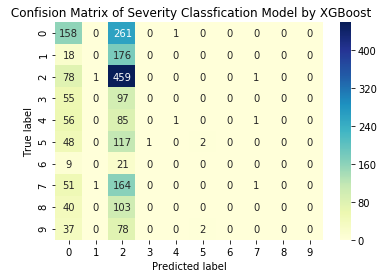

In [109]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test1,pred )
import seaborn as sn
# df_cm = pd.DataFrame(cnf_matrix)
sn.heatmap(cnf_matrix,annot=True, fmt="d", cmap="YlGnBu",linecolor='r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(' Confision Matrix of Severity Classfication Model by XGBoost')

In [136]:
joblib.dump(model, "severity_model_xgb.m")

['severity_model_xgb.m']

In [86]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=5,max_depth=10,splitter='random')
clf = clf.fit(X_train2,y_train2)

In [87]:
y_test_pred = clf.predict(X_test2)
from sklearn.metrics import classification_report
print (classification_report(y_test2,y_test_pred))

             precision    recall  f1-score   support

          0       0.24      0.38      0.29       398
      0-100       0.10      0.04      0.06       192
   100-1000       0.31      0.67      0.42       544
  1000-2000       0.20      0.04      0.07       143
10000-20000       0.13      0.01      0.03       136
  2000-3000       0.10      0.06      0.08       157
     20000+       0.00      0.00      0.00        41
  3000-5000       0.10      0.02      0.03       221
  5000-7000       0.06      0.01      0.02       165
 7000-10000       0.09      0.02      0.03       126

avg / total       0.18      0.26      0.19      2123



In [92]:
from sklearn import svm
svm = svm.SVC(random_state=10,probability=True)
svm.fit(X_train2,y_train2)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=10, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
y_test_pred = svm.predict(X_test2)
from sklearn.metrics import classification_report
print (classification_report(y_test2,y_test_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       398
      0-100       0.00      0.00      0.00       192
   100-1000       0.26      1.00      0.41       544
  1000-2000       0.00      0.00      0.00       143
10000-20000       0.00      0.00      0.00       136
  2000-3000       1.00      0.01      0.03       157
     20000+       1.00      0.02      0.05        41
  3000-5000       1.00      0.00      0.01       221
  5000-7000       1.00      0.01      0.01       165
 7000-10000       0.00      0.00      0.00       126

avg / total       0.34      0.26      0.11      2123



/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


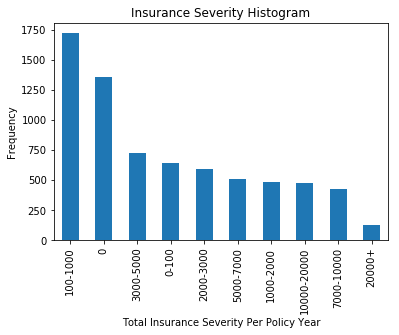

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Total Insurance Severity Per Policy Year')
plt.ylabel('Frequency')
train.severity_class.value_counts().plot.bar(title='Insurance Severity Histogram')
plt.show()

In [ ]:
####线性模型

In [6]:
train.head()

,Unnamed: 0,Policynumber,ADDDVREBCTEXT1_accountancy,ADDDVREBCTEXT1_acousticengineer,ADDDVREBCTEXT1_addressingcircularisingservices,ADDDVREBCTEXT1_advertising,ADDDVREBCTEXT1_aerialerector,ADDDVREBCTEXT1_aerialmanufacturer,ADDDVREBCTEXT1_aerialphotography,ADDDVREBCTEXT1_aerialsupplier,...,Total_Incurred,CONFINE1_1,CONFINE1_2,CONFINE1_3,CONFINE1_4,CONFINE2_1,CONFINE2_2,CONFINE2_3,CONFINE2_4,severity_class
0,463,ANCV0004918,0,0,0,0,0,0,0,0,...,83.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100
1,480,ANCV0004936,0,0,0,0,0,0,0,0,...,0.00,600.0,6.0,0.0,0.0,100.0,3.0,0.0,0.0,0
2,484,ANCV0004942,0,0,0,0,0,0,0,0,...,0.00,160.0,4.0,0.0,0.0,235.0,3.0,0.0,0.0,0
3,709,ANCV0005245,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,741,ANCV0005296,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
data = train.drop(['Unnamed: 0','Policynumber','Claim_Count','Blame','severity_class'],axis=1)
data = data.fillna('0')

In [8]:
data.shape

(7076, 14610)

In [9]:
TrainX = data.drop(['Total_Incurred'],axis=1)
import numpy as np
X = np.array(TrainX)
y = np.array (data.Total_Incurred)
print (X.shape)
print (y.shape)

(7076, 14609)
(7076,)


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)
X_new = pca.fit_transform(X)

In [14]:
from sklearn.cross_validation import train_test_split
X_train2, X_test2,y_train2, y_test2 = train_test_split(X_new,y,test_size=0.3)

In [ ]:
#svm with pca

In [ ]:
from sklearn import svm
clf = svm.SVR(kernel='linear')
clf.fit(X_train2, y_train2) 

In [16]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test2, clf.predict(X_test2))
rmse = math.sqrt(mse)
print(rmse)
print(mse)

5432.413270466392
29511113.9411


In [19]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test2, clf.predict(X_test2))

2906.2116033195161

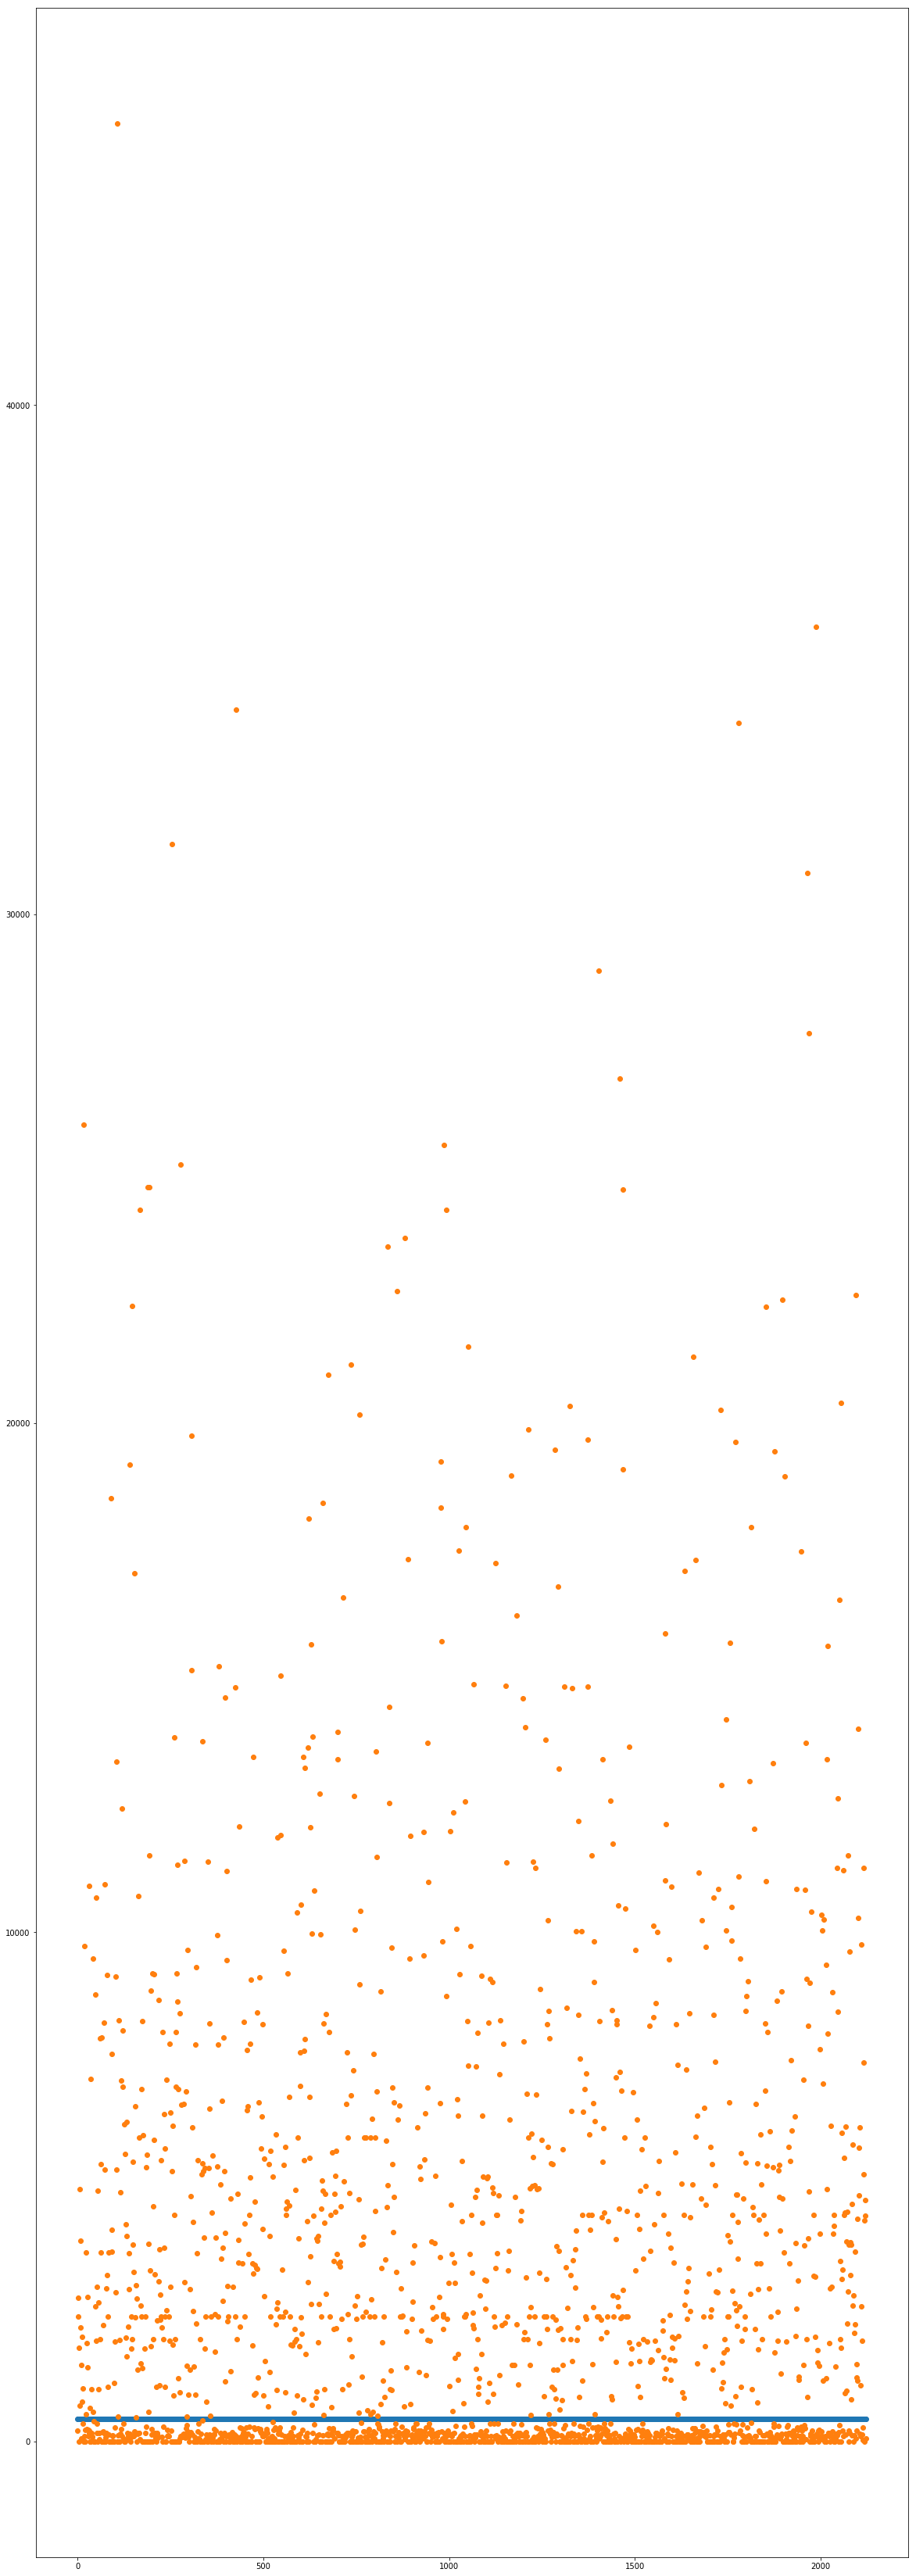

In [21]:
import matplotlib.pyplot as plt
x_ = np.arange(len(y_test2))
plt.figure(num='Comparision',figsize=(20,60))
plt.scatter(x_,clf.predict(X_test2))
plt.scatter(x_,y_test2)
plt.show()

In [22]:
clf.score(X_test2,y_test2)

-0.2844595793570821

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 10)

In [11]:
import xgboost as xgb
x_train = xgb.DMatrix(X_train, y_train)
x_valid = xgb.DMatrix(X_test, y_test)

In [63]:
params = {}
params['objective'] = 'reg:tweedie'
params['eta'] = 0.05
params['silent'] = True
params['max_depth'] = 7
params['subsample'] = 0.9
params['colsample_bytree'] = 0.9

In [21]:
def gini(actual,pred,cmpcol = 0,sortcol = 1):
    assert(len(actual)== len(pred))
    all = np.asarray(np.c_[actual,pred,np.arange(len(actual))],dtype = np.float)
    all = all[np.lexsort((all[:,2],-1*all[:,1]))]
    totallosses = all[:,0].sum()
    ginisum = all[:,0].cumsum().sum()/totallosses
    
    ginisum -= (len(actual)+1)/2
    return ginisum/len(actual)
def gini_normalized(a,p):
    return gini(a,p)/gini(a,a)
def gini_xgb(preds,dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels,preds)
    return [("gini",gini_score)]

In [64]:
watchlist = [(x_train, 'train'), (x_valid, 'valid')]
model_xgb = xgb.train(params, x_train, 300, watchlist,
                      feval=gini_xgb, early_stopping_rounds=300, maximize=True, verbose_eval=10)

[0]	train-tweedie-nloglik@1.5:4611.16	valid-tweedie-nloglik@1.5:4725.17	train-gini:0.003116	valid-gini:0.033583
Multiple eval metrics have been passed: 'valid-gini' will be used for early stopping.

Will train until valid-gini hasn't improved in 300 rounds.
[10]	train-tweedie-nloglik@1.5:2803.31	valid-tweedie-nloglik@1.5:2882.56	train-gini:0.019687	valid-gini:0.038247
[20]	train-tweedie-nloglik@1.5:1710.84	valid-tweedie-nloglik@1.5:1763.27	train-gini:0.035168	valid-gini:0.028247
[30]	train-tweedie-nloglik@1.5:1053.17	valid-tweedie-nloglik@1.5:1091.74	train-gini:0.058977	valid-gini:0.018453
[40]	train-tweedie-nloglik@1.5:662.909	valid-tweedie-nloglik@1.5:690.991	train-gini:0.173908	valid-gini:0.100102
[50]	train-tweedie-nloglik@1.5:438.137	valid-tweedie-nloglik@1.5:463.936	train-gini:0.313269	valid-gini:0.128614
[60]	train-tweedie-nloglik@1.5:316.463	valid-tweedie-nloglik@1.5:342.2	train-gini:0.478012	valid-gini:0.084272
[70]	train-tweedie-nloglik@1.5:254.651	valid-tweedie-nloglik@1.5:2

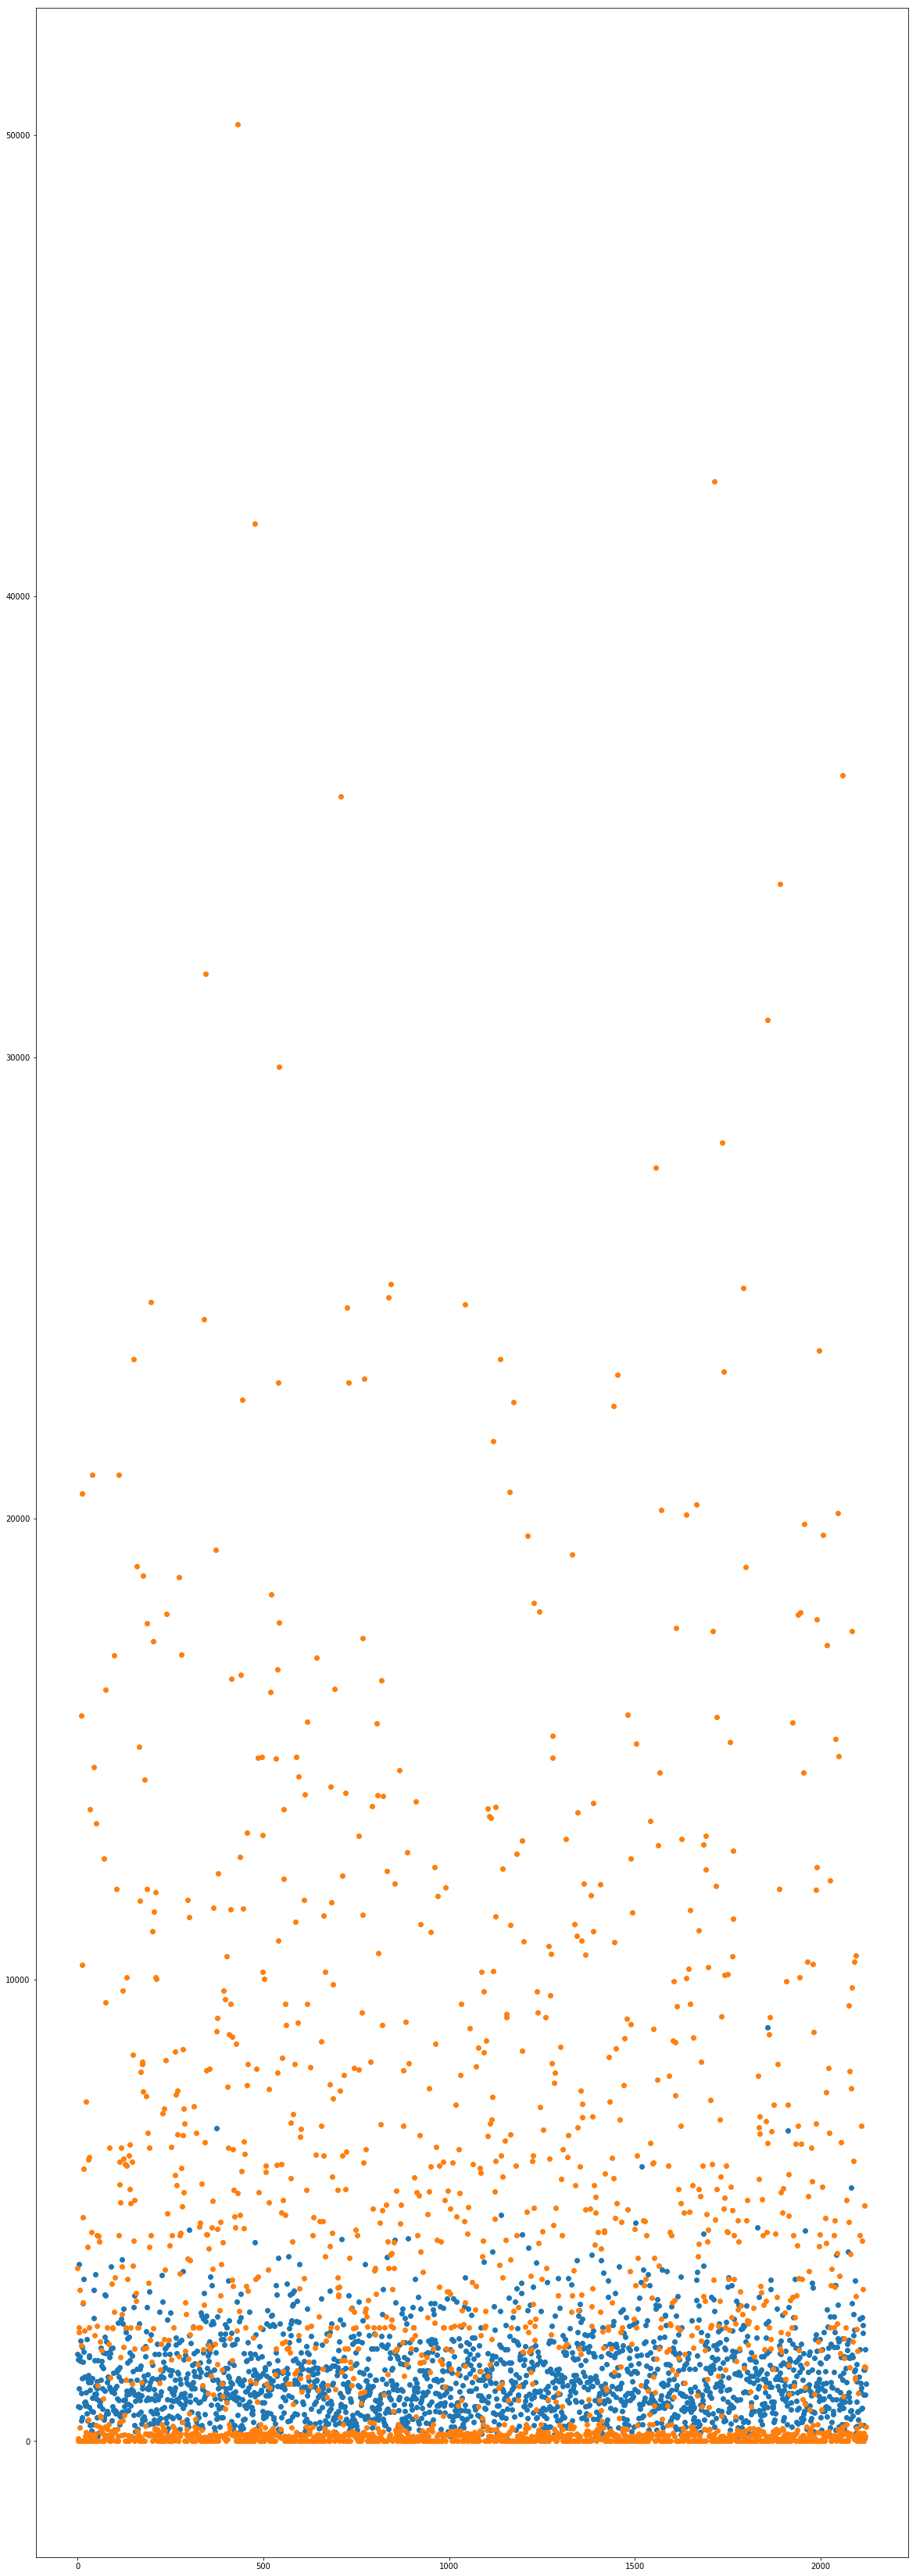

In [66]:
import matplotlib.pyplot as plt
x_ = np.arange(len(y_test))
plt.figure(num='Comparision',figsize=(20,60))
plt.scatter(x_,model_xgb.predict(x_valid))
plt.scatter(x_,y_test)
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, model_xgb.predict(x_valid))
rmse = math.sqrt(mse)
print(rmse)
print(mse)

5475.787702099274
29984250.9585


In [72]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, model_xgb.predict(x_valid))

3117.1195167582114

In [1]:
from sklearn.metrics import mean_squared_error
import math
mse = 25605693.112046335
rmse = math.sqrt(mse)
print(rmse)
print(mse)

5060.206825026655
25605693.112046335
